<a href="https://colab.research.google.com/github/YKochura/ml-kpi/blob/main/code/lecture2_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/lec2/'

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams["figure.dpi"] = 80

def remove_frame():
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

np.random.seed(111)

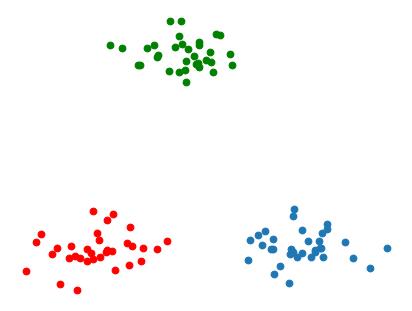

In [4]:
# classification
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=3)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1], c="g")
plt.scatter(X[y>1, 0], X[y>1, 1], c="r")
plt.xticks([])
plt.yticks([])
plt.grid()
remove_frame()
plt.savefig(path + "classification.png")

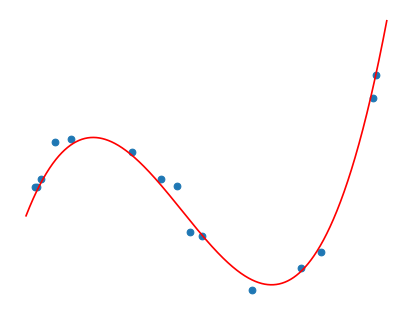

In [5]:
# regression
def true_f(x):
    return 0.1 * (x-2) ** 3 + x ** 2 - 8.0 * x - 1.0

def generate(n_samples):
    X = np.random.rand(n_samples) * 20.0 - 10.0
    y = true_f(X) + 5 * np.random.randn(n_samples)

    return X.reshape(n_samples, 1), y

X_train, y_train = generate(15)

xs = np.linspace(-10, 10, num=1000)
plt.plot(xs, true_f(xs), c="r", label="$g(X)$")
plt.scatter(X_train, y_train, label="$y = g(X) + \epsilon$")
plt.xticks([])
plt.yticks([])
plt.grid()
remove_frame()
plt.savefig(path + "regression.png")

In [6]:
def true_f(x):
    return 0.1 * (x-2) ** 3 + x ** 2 - 6.0 * x + 1.0

def generate(n_samples):
    X = np.random.rand(n_samples) * 20.0 - 10.0
    y = true_f(X) + 10 * np.random.randn(n_samples)

    return X.reshape(n_samples, 1), y

In [7]:
X_train, y_train = generate(15)

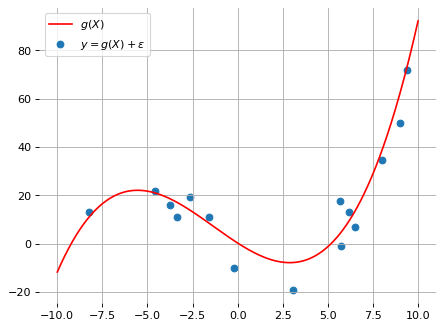

In [8]:
# data
xs = np.linspace(-10, 10, num=1000)
plt.plot(xs, true_f(xs), c="r", label="$g(X)$")
plt.scatter(X_train, y_train, label="$y = g(X) + \epsilon$")
plt.grid()
plt.legend()
remove_frame()
plt.savefig(path + "data.png")

In [9]:
from sklearn.preprocessing import PolynomialFeatures

def model(X, beta, poly):
    Xp = poly.transform(X)
    return np.dot(Xp, beta)

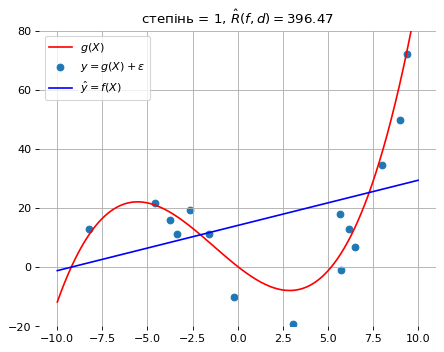

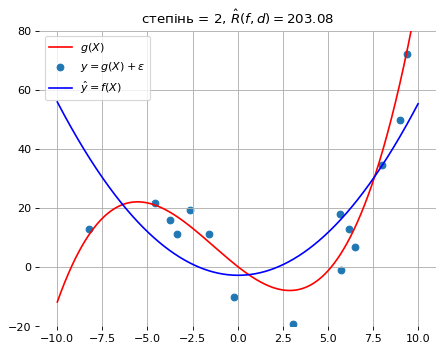

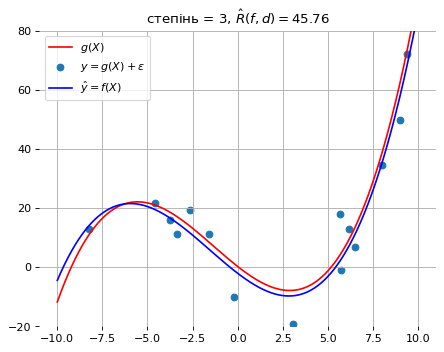

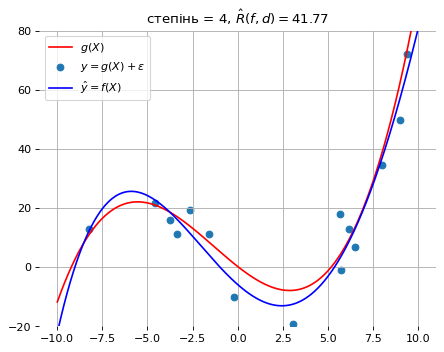

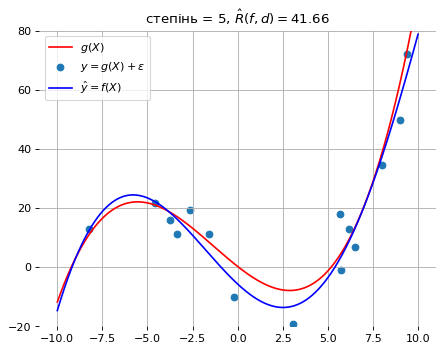

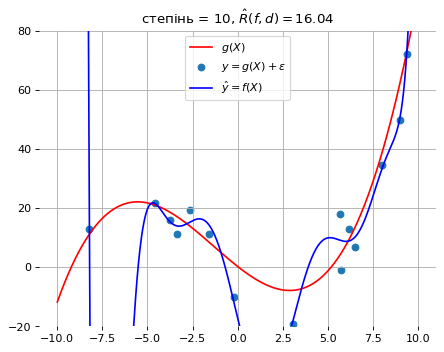

In [10]:
for degree in [1, 2, 3, 4, 5, 10]:
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    Xp = poly.fit_transform(X_train)
    beta = np.dot(np.dot(np.linalg.inv(np.dot(Xp.T, Xp)), Xp.T), y_train)

    error = np.mean((y_train - model(X_train, beta, poly)) ** 2)

    plt.plot(xs, true_f(xs), c="r", label="$g(X)$")
    plt.scatter(X_train, y_train, label="$y = g(X) + \epsilon$")
    plt.plot(xs, model(xs.reshape(-1,1), beta, poly), c="b", label="$\hat{y} = f(X)$")

    plt.title("степінь = %d, $\hat{R}(f, d) = %.2f$" % (degree, error))
    plt.ylim(-20, 80)
    plt.grid()
    plt.legend()
    remove_frame()
    plt.savefig(path + "poly-%d.png" % degree)
    plt.show()

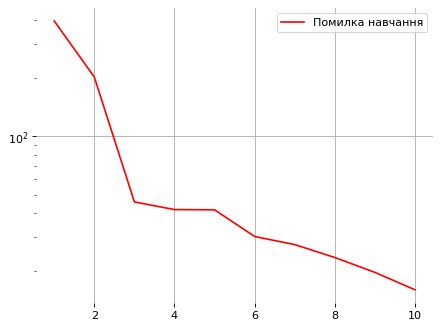

In [11]:
train_error = []

for degree in range(1, 11):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    Xp = poly.fit_transform(X_train)
    beta = np.dot(np.dot(np.linalg.inv(np.dot(Xp.T, Xp)), Xp.T), y_train)

    error = np.mean((y_train - model(X_train, beta, poly)) ** 2)
    train_error.append(error)


plt.plot(range(1,11), train_error, c="r", label="Помилка навчання")


#plt.ylim(-20, 80)
plt.yscale("log")
plt.grid()
plt.legend()
remove_frame()
plt.savefig(path + "training-error.png")
plt.show()

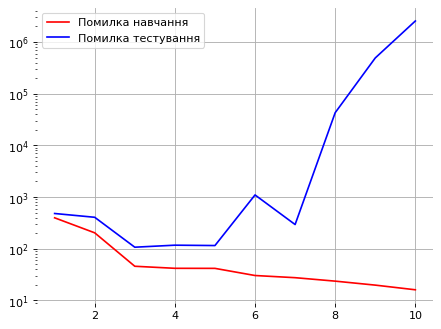

In [12]:
train_error = []
test_error = []
X_test, y_test = generate(10000)

for degree in range(1, 11):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    Xp = poly.fit_transform(X_train)
    beta = np.dot(np.dot(np.linalg.inv(np.dot(Xp.T, Xp)), Xp.T), y_train)

    error = np.mean((y_train - model(X_train, beta, poly)) ** 2)
    train_error.append(error)
    error = np.mean((y_test - model(X_test, beta, poly)) ** 2)
    test_error.append(error)

plt.plot(range(1,11), train_error, c="r", label="Помилка навчання")
plt.plot(range(1,11), test_error, c="b", label="Помилка тестування")

#plt.ylim(-20, 80)
plt.yscale("log")
plt.grid()
plt.legend()
remove_frame()
plt.savefig(path + "training-test-error.png")
plt.show()

In [13]:
train_error

[396.4721416249674,
 203.07622399740836,
 45.76406940448453,
 41.774326747315364,
 41.662508762371644,
 30.299504621104436,
 27.508071793710602,
 23.581100812135215,
 19.748811862813078,
 16.043646345684706]

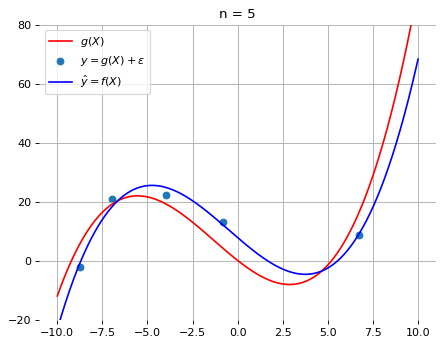

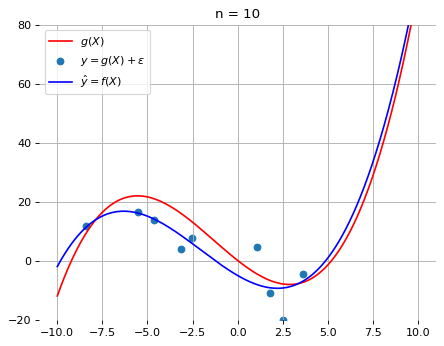

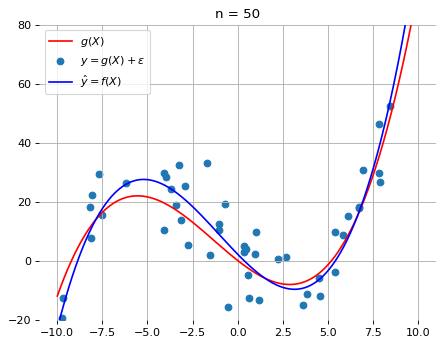

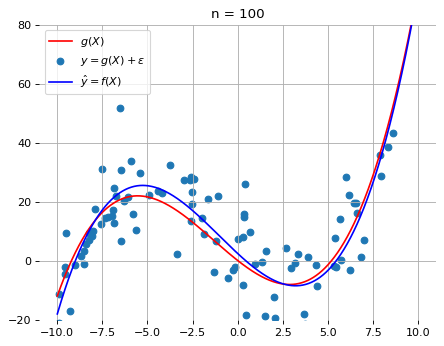

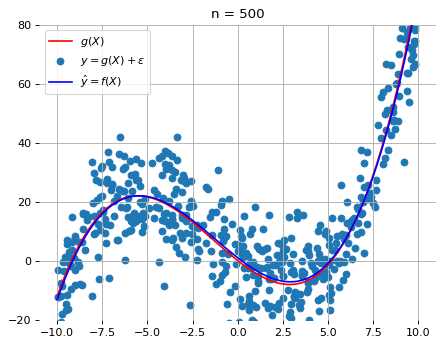

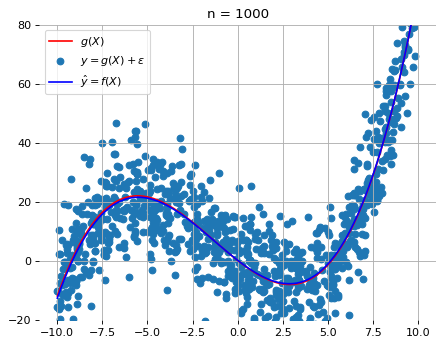

In [14]:
np.random.seed(777)

for N in [5, 10, 50, 100, 500, 1000]:
    X_train, y_train = generate(N)

    poly = PolynomialFeatures(degree=3, include_bias=True)
    Xp = poly.fit_transform(X_train)
    beta = np.dot(np.dot(np.linalg.inv(np.dot(Xp.T, Xp)), Xp.T), y_train)

    error = np.mean((y_train - model(X_train, beta, poly)) ** 2)

    plt.plot(xs, true_f(xs), c="r", label="$g(X)$")
    plt.scatter(X_train, y_train, label="$y = g(X) + \epsilon$")
    plt.plot(xs, model(xs.reshape(-1,1), beta, poly), c="b", label="$\hat{y} = f(X)$")

    plt.title("n = %d" % N)
    plt.ylim(-20, 80)
    plt.grid()
    plt.legend()
    remove_frame()
    plt.savefig(path + "poly-N-%d.png" % N)
    plt.show()

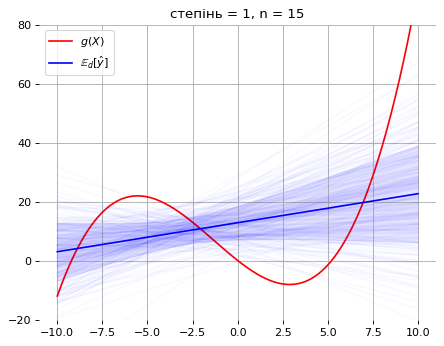

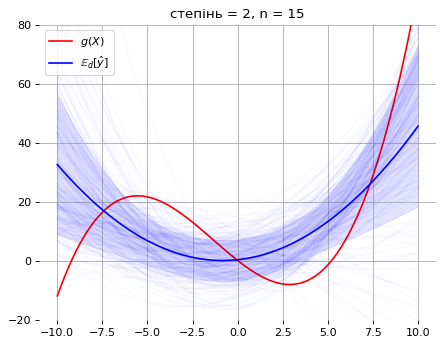

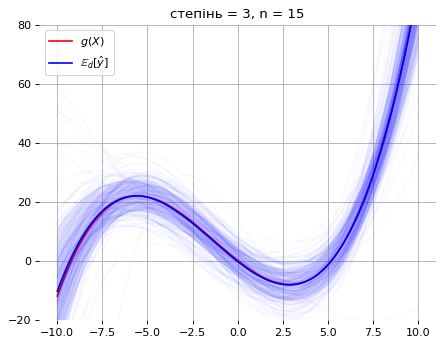

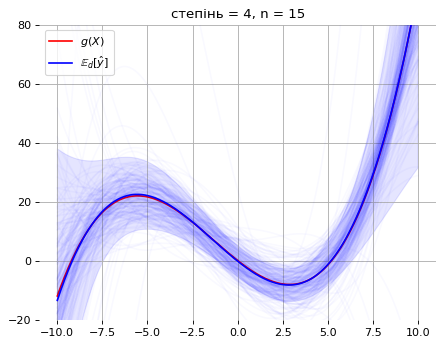

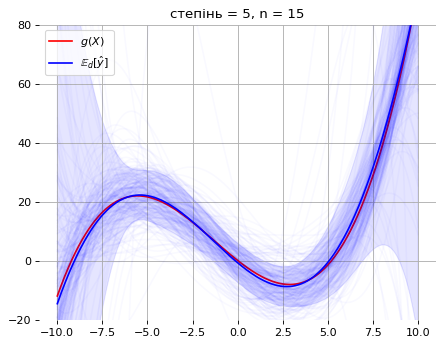

In [15]:
np.random.seed(42)

for degree in [1, 2, 3, 4, 5]:
    y_pred = []

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    plt.plot(xs, true_f(xs), c="r", label="$g(X)$")

    for i in range(200):
        N = 15
        X_train, y_train = generate(N)

        poly = PolynomialFeatures(degree=degree, include_bias=True)
        Xp = poly.fit_transform(X_train)
        beta = np.dot(np.dot(np.linalg.inv(np.dot(Xp.T, Xp)), Xp.T), y_train)

        error = np.mean((y_train - model(X_train, beta, poly)) ** 2)

        pred = model(xs.reshape(-1,1), beta, poly)
        plt.plot(xs, pred, c="b", alpha=0.025)

        y_pred.append(pred)

    m = np.mean(y_pred, axis=0)
    s = np.std(y_pred, axis=0)
    plt.plot(xs, m, c="b", label="$\mathbb{E}_{d} [\hat{y}]$")
    ax1.fill_between(xs, m+s, m-s, color="b", alpha=0.1)

    plt.title("степінь = %d, n = %d" % (degree, N))
    plt.ylim(-20, 80)
    plt.grid()
    plt.legend(loc="upper left")
    remove_frame()
    plt.savefig(path + "poly-avg-degree-%d.png" % degree)
    plt.show()